### 步骤1 安装并引入必要的库

In [ ]:
!pip install torch==1.4.0
!pip install numpy==1.16.0
!pip install matplotlib==3.1.0

In [2]:
!pip show tensorboardX

Name: tensorboardX
Version: 2.0
Summary: TensorBoardX lets you watch Tensors Flow without Tensorflow
Home-page: https://github.com/lanpa/tensorboardX
Author: Tzu-Wei Huang
Author-email: huang.dexter@gmail.com
License: MIT license
Location: /Applications/anaconda3/lib/python3.7/site-packages
Requires: six, protobuf, numpy
Required-by: 


In [3]:
%matplotlib inline
import torch
import torchvision
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from utils import Logger
import numpy as np

### 步骤2 载入图片并进行预处理

In [4]:
batch_size = 100
trans = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5,), (.5,))
        ])
fmnist = torchvision.datasets.FashionMNIST(root="./", train=True, transform=trans, download=True)
data_loader = torch.utils.data.DataLoader(dataset=fmnist, batch_size=batch_size, shuffle=True)
num_batches = len(data_loader)

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [2]:
my_itr = iter(data_loader)
images, labels = my_itr.next()
print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


### 步骤3 定义基本辅助函数

In [5]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

def noise(size):
    n = Variable(torch.randn(size, 110))
    return n

### 步骤4 定义判别器和生成器

In [6]:
class DiscriminatorNet(torch.nn.Module):
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 28*28
        n_out = 10
        
        self.hidden1 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3))
        self.hidden2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3))
        self.hidden3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3))
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out))

    def forward(self, x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.out(x)
        return x
    
discriminator = DiscriminatorNet()

In [7]:
class GeneratorNet(torch.nn.Module):
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 110
        n_out = 28*28
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2))
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2))
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2))
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh())

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
    
generator = GeneratorNet()

In [8]:
d_optimizer = optim.RMSprop(discriminator.parameters(), lr=0.0001)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0005)
loss = nn.BCEWithLogitsLoss()

### 步骤5 训练模型

In [9]:
num_test_samples = 16
test_noise = noise(num_test_samples)

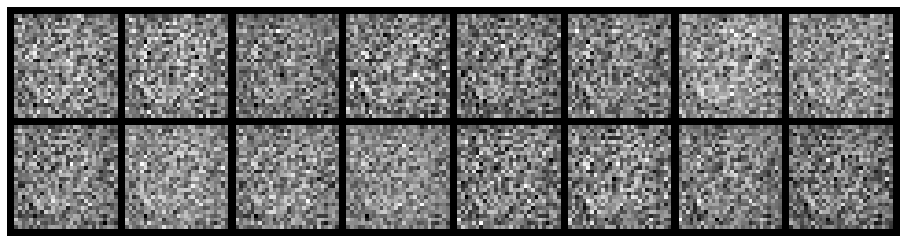

Epoch: [0/5], Batch Num: [0/600]
判别器损失: 1.3775, 生成器损失: 0.6807
D(x): -0.0131, D(G(z)): -0.0095


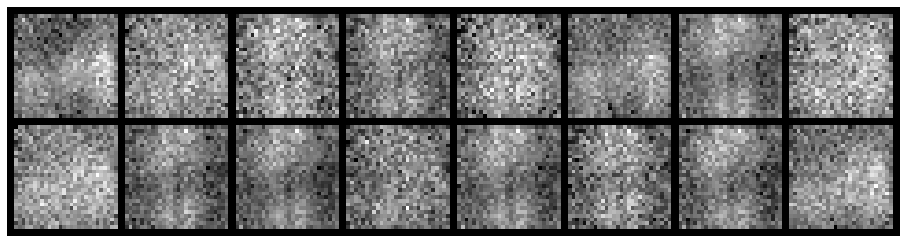

Epoch: [0/5], Batch Num: [100/600]
判别器损失: 0.3021, 生成器损失: 0.3082
D(x): -5.7575, D(G(z)): -2.3516


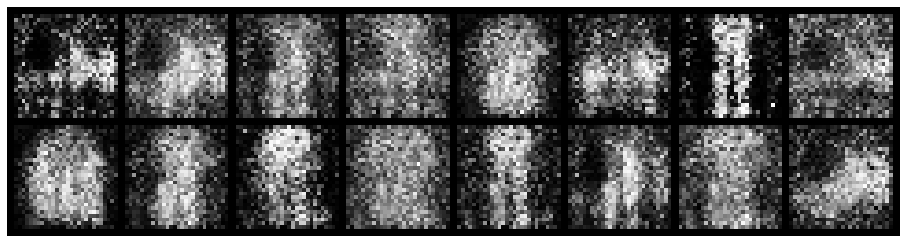

Epoch: [0/5], Batch Num: [200/600]
判别器损失: 0.1969, 生成器损失: 0.2158
D(x): -6.4762, D(G(z)): -6.8694


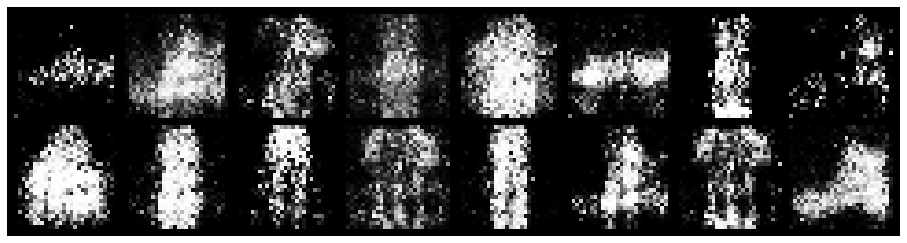

Epoch: [0/5], Batch Num: [300/600]
判别器损失: 0.1994, 生成器损失: 0.1068
D(x): -6.4453, D(G(z)): -8.2243


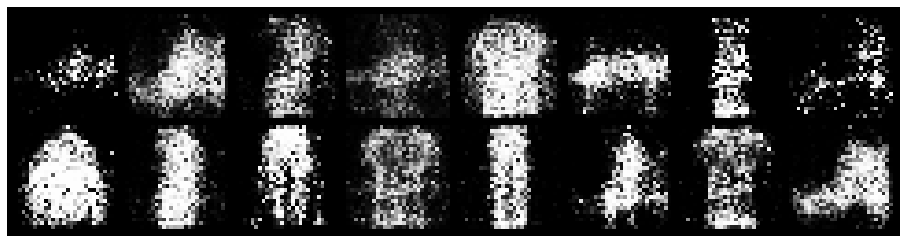

Epoch: [0/5], Batch Num: [400/600]
判别器损失: 0.2096, 生成器损失: 0.1054
D(x): -5.5262, D(G(z)): -6.9494


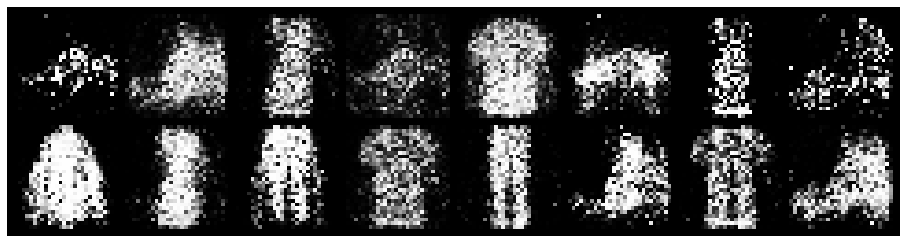

Epoch: [0/5], Batch Num: [500/600]
判别器损失: 0.1695, 生成器损失: 0.0840
D(x): -6.5832, D(G(z)): -7.8978


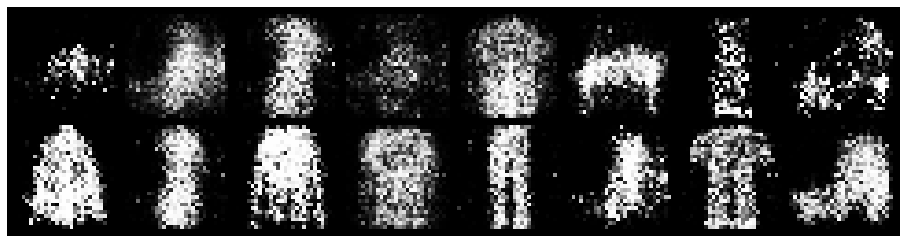

Epoch: [1/5], Batch Num: [0/600]
判别器损失: 0.1836, 生成器损失: 0.0981
D(x): -5.2860, D(G(z)): -7.5904


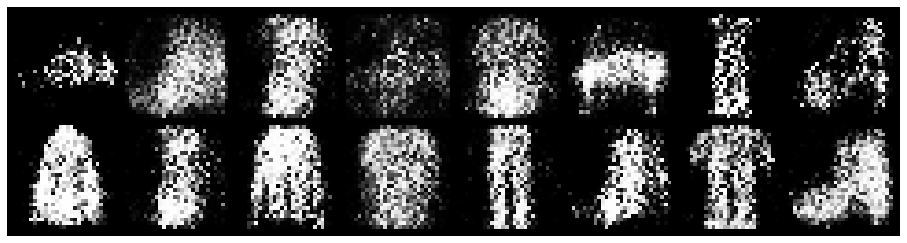

Epoch: [1/5], Batch Num: [100/600]
判别器损失: 0.2043, 生成器损失: 0.0799
D(x): -5.9129, D(G(z)): -7.6256


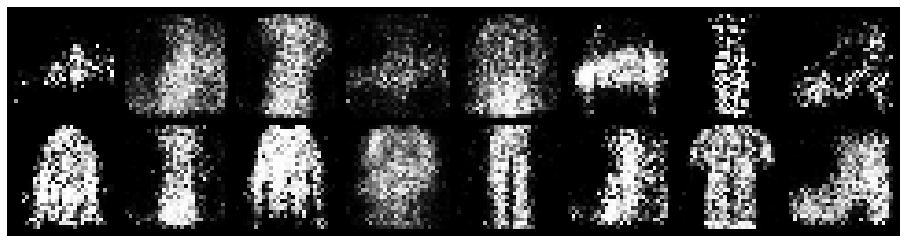

Epoch: [1/5], Batch Num: [200/600]
判别器损失: 0.1579, 生成器损失: 0.0659
D(x): -5.9589, D(G(z)): -8.4273


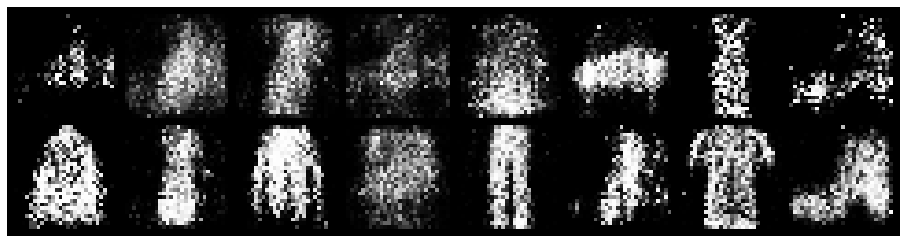

Epoch: [1/5], Batch Num: [300/600]
判别器损失: 0.1555, 生成器损失: 0.0664
D(x): -6.5741, D(G(z)): -9.3687


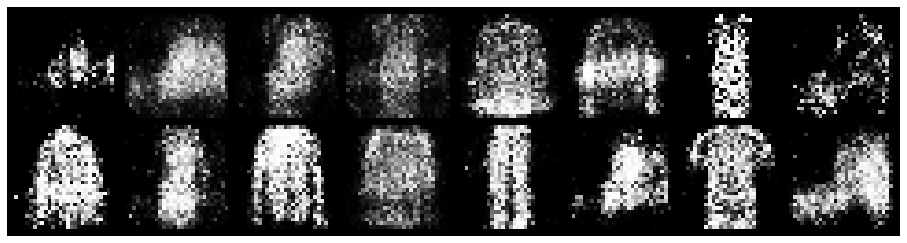

Epoch: [1/5], Batch Num: [400/600]
判别器损失: 0.1477, 生成器损失: 0.0441
D(x): -6.7215, D(G(z)): -9.4249


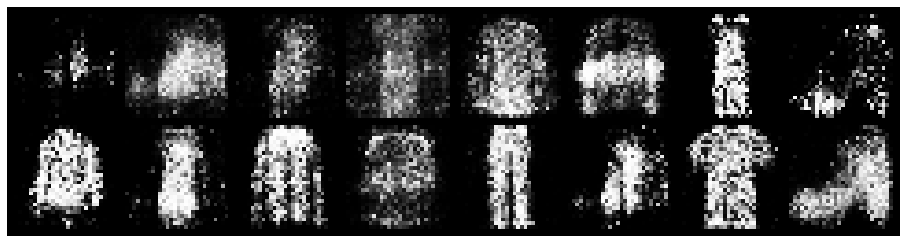

Epoch: [1/5], Batch Num: [500/600]
判别器损失: 0.1501, 生成器损失: 0.0386
D(x): -7.2255, D(G(z)): -9.5932


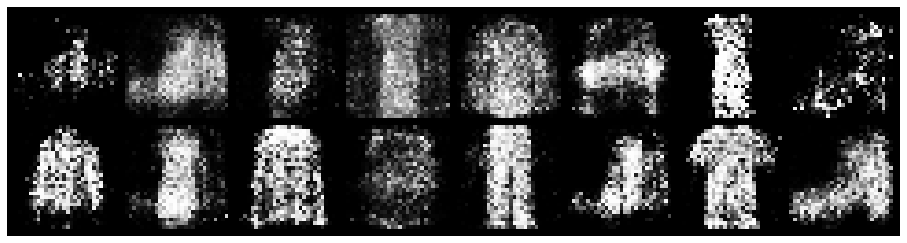

Epoch: [2/5], Batch Num: [0/600]
判别器损失: 0.1722, 生成器损失: 0.0440
D(x): -7.4847, D(G(z)): -9.9443


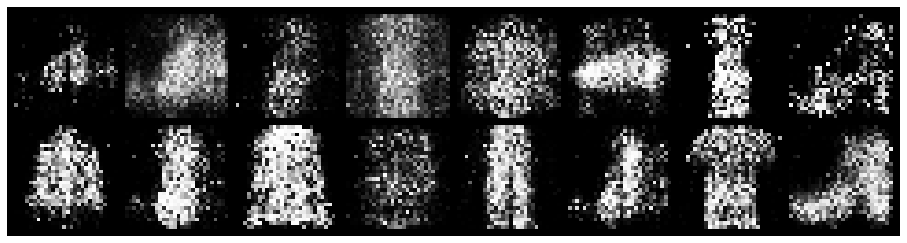

Epoch: [2/5], Batch Num: [100/600]
判别器损失: 0.1554, 生成器损失: 0.0657
D(x): -6.6475, D(G(z)): -8.8956


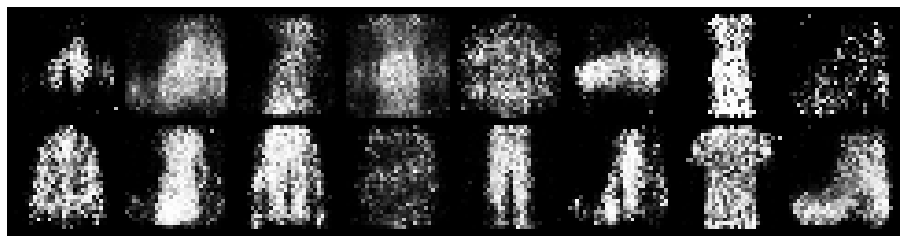

Epoch: [2/5], Batch Num: [200/600]
判别器损失: 0.1621, 生成器损失: 0.0335
D(x): -7.7046, D(G(z)): -11.1787


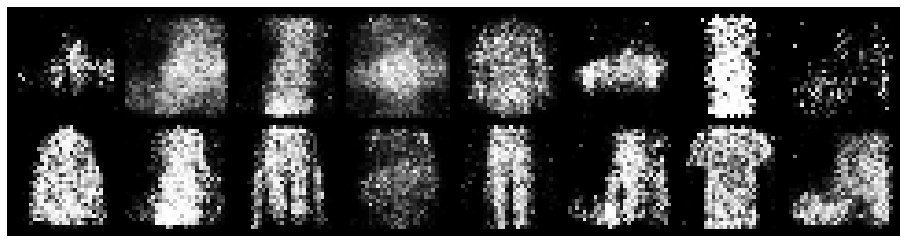

Epoch: [2/5], Batch Num: [300/600]
判别器损失: 0.1529, 生成器损失: 0.0715
D(x): -6.7575, D(G(z)): -8.3149


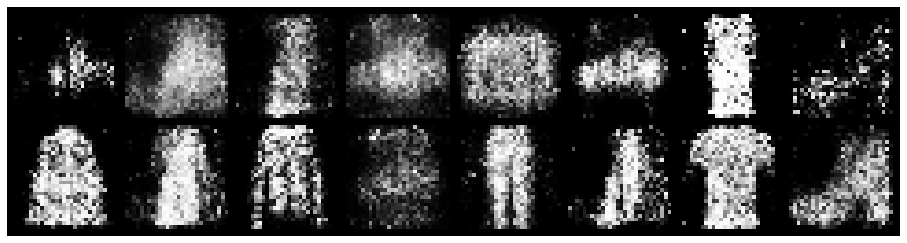

Epoch: [2/5], Batch Num: [400/600]
判别器损失: 0.1567, 生成器损失: 0.0394
D(x): -7.5651, D(G(z)): -11.0878


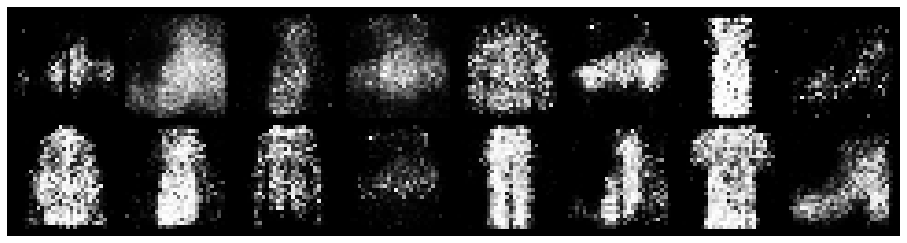

Epoch: [2/5], Batch Num: [500/600]
判别器损失: 0.1372, 生成器损失: 0.0478
D(x): -7.4960, D(G(z)): -10.0836


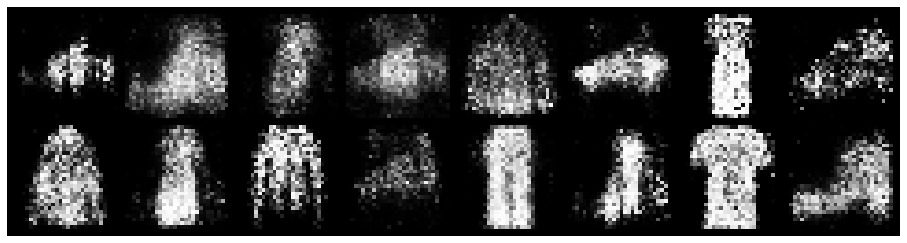

Epoch: [3/5], Batch Num: [0/600]
判别器损失: 0.1413, 生成器损失: 0.0284
D(x): -8.6636, D(G(z)): -12.9405


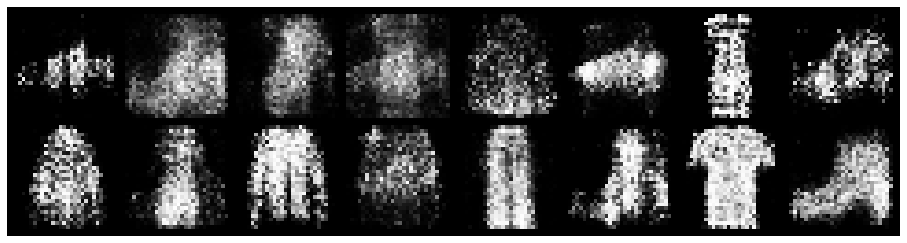

Epoch: [3/5], Batch Num: [100/600]
判别器损失: 0.1472, 生成器损失: 0.0281
D(x): -8.9432, D(G(z)): -11.8200


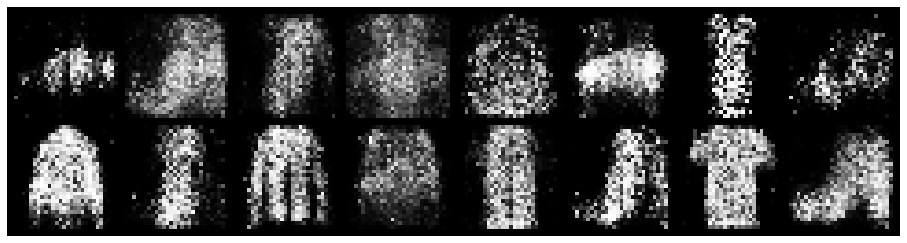

Epoch: [3/5], Batch Num: [200/600]
判别器损失: 0.1539, 生成器损失: 0.0653
D(x): -6.7280, D(G(z)): -9.9427


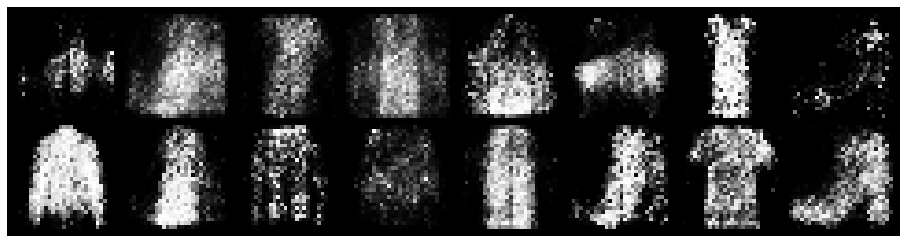

Epoch: [3/5], Batch Num: [300/600]
判别器损失: 0.1544, 生成器损失: 0.0513
D(x): -6.9492, D(G(z)): -10.1842


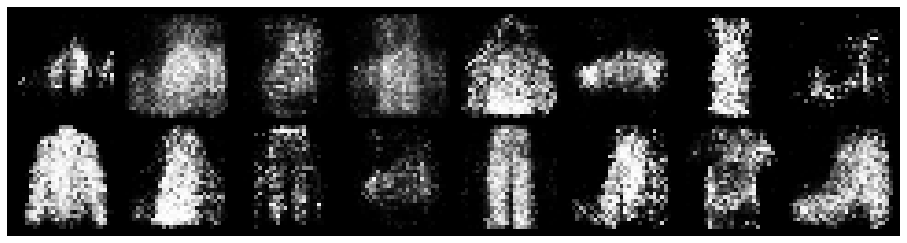

Epoch: [3/5], Batch Num: [400/600]
判别器损失: 0.1189, 生成器损失: 0.0536
D(x): -7.6988, D(G(z)): -9.5331


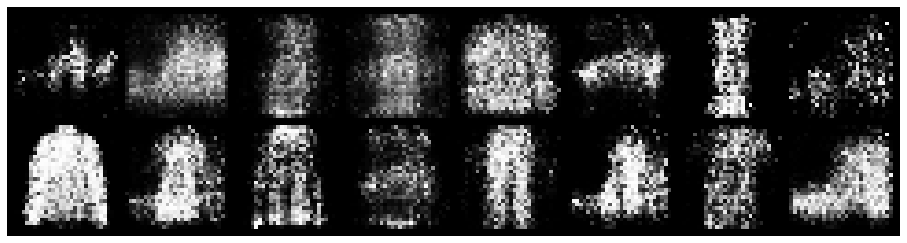

Epoch: [3/5], Batch Num: [500/600]
判别器损失: 0.1576, 生成器损失: 0.0428
D(x): -8.4481, D(G(z)): -10.8222


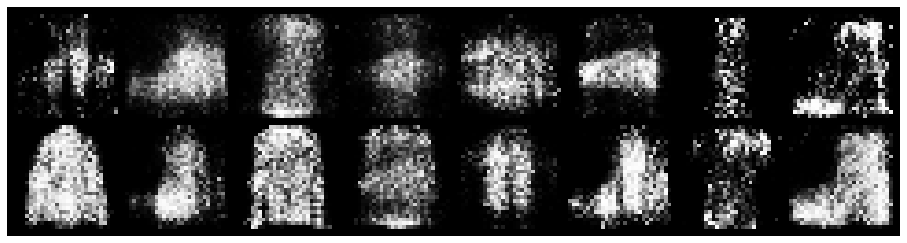

Epoch: [4/5], Batch Num: [0/600]
判别器损失: 0.1098, 生成器损失: 0.0404
D(x): -8.6730, D(G(z)): -10.6468


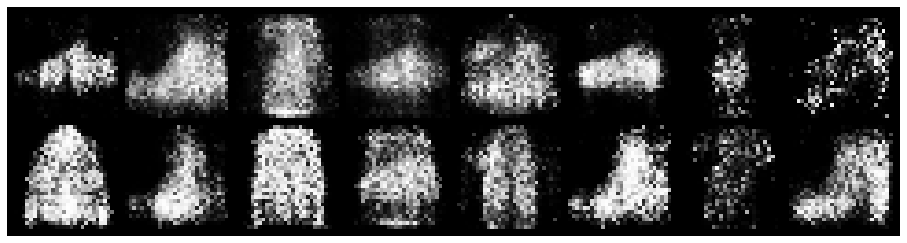

Epoch: [4/5], Batch Num: [100/600]
判别器损失: 0.1088, 生成器损失: 0.0457
D(x): -8.2810, D(G(z)): -10.6743


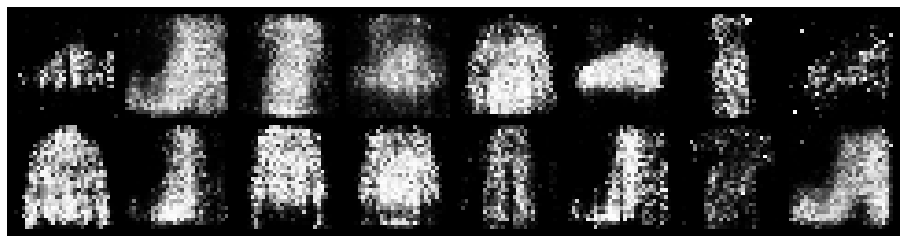

Epoch: [4/5], Batch Num: [200/600]
判别器损失: 0.1356, 生成器损失: 0.0575
D(x): -8.1436, D(G(z)): -9.6392


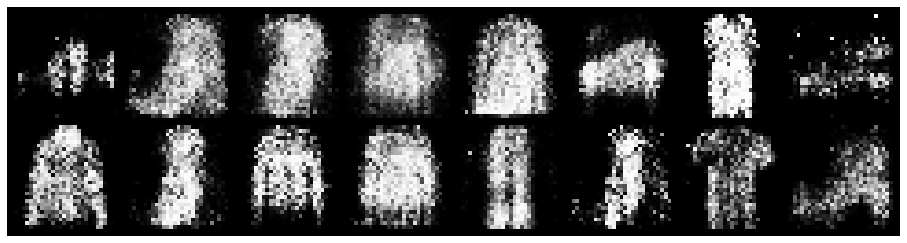

Epoch: [4/5], Batch Num: [300/600]
判别器损失: 0.1270, 生成器损失: 0.0277
D(x): -9.3942, D(G(z)): -12.3690


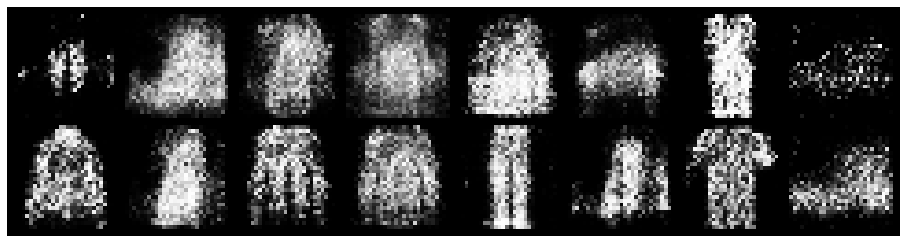

Epoch: [4/5], Batch Num: [400/600]
判别器损失: 0.1207, 生成器损失: 0.0376
D(x): -8.9312, D(G(z)): -11.6119


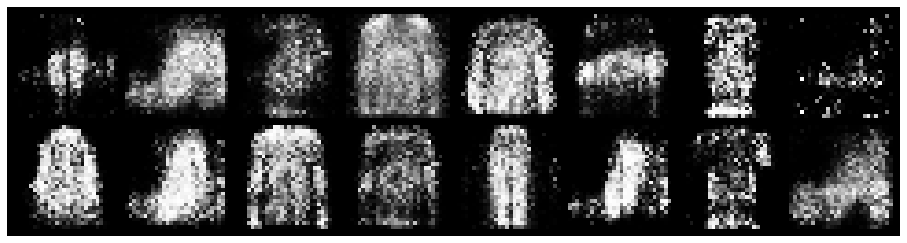

Epoch: [4/5], Batch Num: [500/600]
判别器损失: 0.1163, 生成器损失: 0.0512
D(x): -8.6371, D(G(z)): -11.1016


In [10]:
logger = Logger(model_name='cGAN', data_name='FMNIST')

train_loss_g = []
train_loss_d = []

num_epochs = 5

for epoch in range(num_epochs):
    
    for n_batch, (real_batch,label) in enumerate(data_loader):
        
        N = real_batch.size(0)
        
        labels_onehot = np.zeros((N,10))
        labels_onehot[np.arange(N),label.numpy()] = 1
        
        real_label = Variable(torch.from_numpy(labels_onehot).float())
        fake_label = Variable(torch.zeros(N,10))
        
        real_data = Variable(images_to_vectors(real_batch))
        fake_data = generator(noise(N)).detach()
        
        d_optimizer.zero_grad()
        d_pred_real = discriminator(real_data)
        error_real = loss(d_pred_real, real_label)
        
        d_pred_fake = discriminator(fake_data)
        error_fake = loss(d_pred_fake, fake_label)
        
        d_error = error_real + error_fake
        train_loss_d.append(d_error)
        d_error.backward()
        d_optimizer.step()
        
        #----------------------------------------------------------
        
        g_optimizer.zero_grad()
        
        z = torch.randn(N, 100) 
        z = np.concatenate((z.numpy(),labels_onehot),axis=1)
        z = Variable(torch.from_numpy(z).float())
        
        fake = generator(z)
        prediction = discriminator(fake)
        g_error = loss(prediction, real_label)
        train_loss_g.append(g_error)
        g_error.backward()
        g_optimizer.step()
        
        #-----------------------------------------------------------
    
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )
    

### 步骤6 绘制生成器和判别器的损失曲线

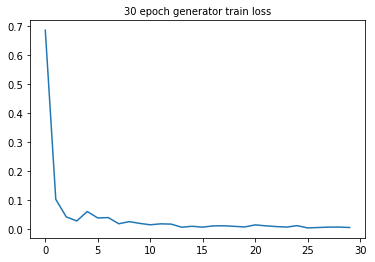

In [9]:
train_loss_g_net = train_loss_g[::600]
plt.title('30 epoch generator train loss', fontsize=10)
plt.plot(train_loss_g_net)

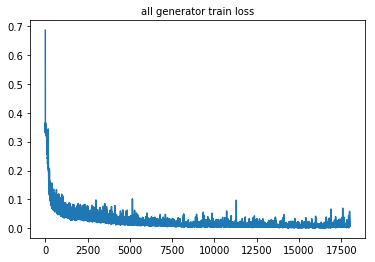

In [10]:
plt.title('all generator train loss', fontsize=10)
plt.plot(train_loss_g)

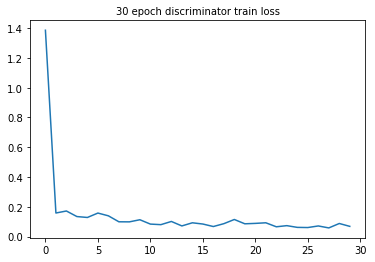

In [11]:
train_loss_d_net = train_loss_d[::600]
plt.title('30 epoch discriminator train loss', fontsize=10)
plt.plot(train_loss_d_net)

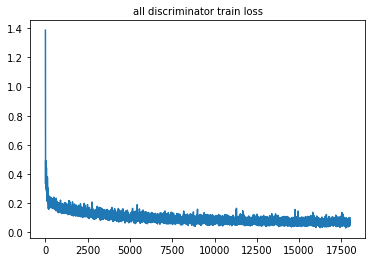

In [12]:
plt.title('all discriminator train loss', fontsize=10)
plt.plot(train_loss_d)

In [29]:
test_label = []
for i in range(10):
    test_label.extend([i] * 3)

def convert_to_one_hot(y, C):
    return np.eye(C)[y.reshape(-1)]

y = np.array(test_label)
test_label = convert_to_one_hot(y,10)
len(test_label)

30

In [14]:
test_size = len(test_label)
z = torch.randn(test_size, 100)  
z = np.concatenate((z.numpy(),test_label),axis=1)
z = Variable(torch.from_numpy(z).float())

fake_images = generator(z)

### 步骤7 可视化GAN的生成结果

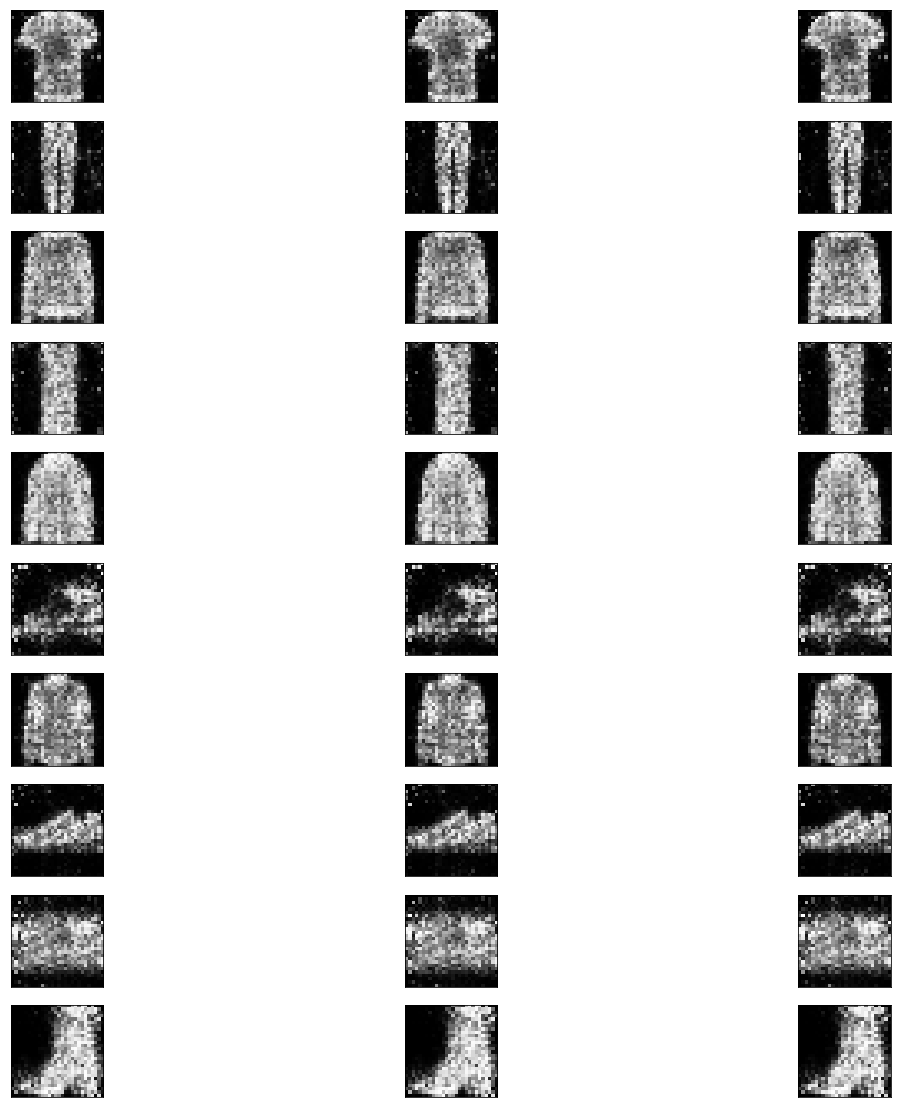

In [15]:
def view_test_samples(test_imgs):
    fig, axes = plt.subplots(figsize=(20,20), nrows=10, ncols=3, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), test_imgs):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
view_test_samples(fake_images)

In [18]:
test_size = len(test_label)
z1 = torch.randn(test_size, 100)  # 随机生成向量
z1 = np.concatenate((z1.numpy(),test_label),axis=1)
z1 = Variable(torch.from_numpy(z1).float())

fake_images1 = generator(z1)

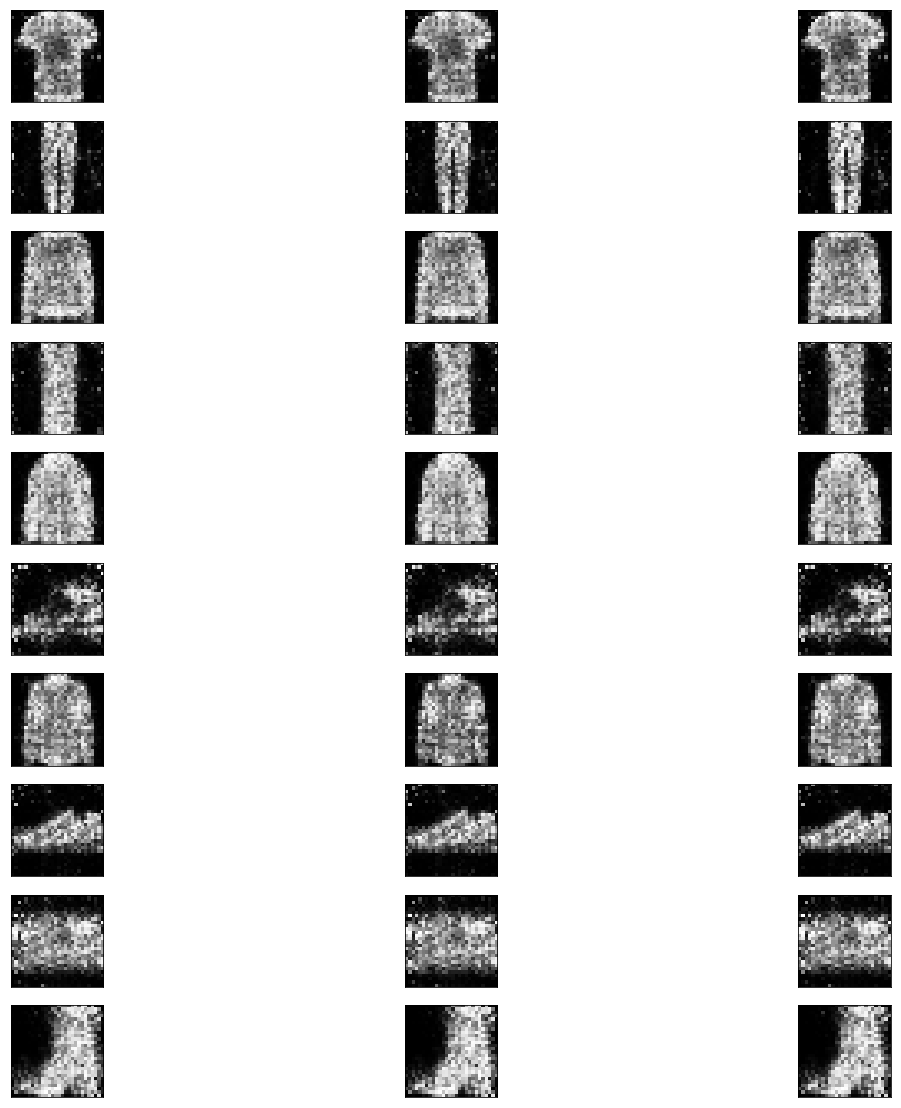

In [34]:
idx = 5
# view_samples(idx,fake_images)
# im = imshow(fake_images[0].detach().reshape((28,28)), cmap='Greys_r')

def view_test_samples(test_imgs):
    fig, axes = plt.subplots(figsize=(20,20), nrows=10, ncols=3, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), test_imgs):
        img = img.detach()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
view_test_samples(fake_images1)

In [ ]:
def test():
    net.eval()
    with torch.no_grad():
        total_correct = 0
        for i, (images, labels) in enumerate(data_test_loader):
            output = net(images)
            pred = output.detach().max(1)[1]
            total_correct += pred.eq(labels.view_as(pred)).sum()

    avg_loss /= len(data_test)
    acc = float(total_correct) / len(data_test)
    print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss.detach().cpu().item(), acc))
    return acc